In [1]:
import trackintel as ti
pfs = ti.io.file.read_positionfixes_csv('pfs.csv', index_col='ID')
sp = ti.io.file.read_staypoints_csv('staypoints.csv', index_col='id')

/usr/local/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/trackintel/io/file.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/

In [2]:
# Generate locations from the staypoints.
new_sp, locs = ti.preprocessing.staypoints.generate_locations(staypoints=sp, method='dbscan', epsilon=100, num_samples=3, agg_level='user')

/usr/local/lib/python3.9/site-packages/trackintel/geogr/distances.py:227: UserWarning: The CRS of your data is not defined.
  warnings.warn("The CRS of your data is not defined.")
/usr/local/lib/python3.9/site-packages/pygeos/io.py:89: UserWarning: The shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the PyGEOS GEOS version (3.10.4-CAPI-1.16.2). Conversions between both will be slow
  warnings.warn(


In [3]:
activity_sp = ti.analysis.location_identification.location_identifier (staypoints= new_sp, pre_filter=True, method='FREQ')

In [4]:
home_sp = activity_sp.loc[activity_sp['purpose'] == 'home']

In [5]:
home_sp

,user_id,started_at,finished_at,geom,location_id,purpose
id,,,,,,
194,3,2022-09-05 12:56:09-04:00,2022-09-05 13:16:09-04:00,POINT (-81.49528 30.33016),18,home
195,3,2022-09-05 13:36:14-04:00,2022-09-05 13:53:05-04:00,POINT (-81.49530 30.33013),18,home
197,3,2022-09-05 16:08:01-04:00,2022-09-05 16:22:23-04:00,POINT (-81.49544 30.33021),18,home
201,3,2022-09-05 16:50:55-04:00,2022-09-05 16:56:51-04:00,POINT (-81.49550 30.32918),18,home
202,3,2022-09-05 16:56:51-04:00,2022-09-05 17:07:47-04:00,POINT (-81.49524 30.33008),18,home
...,...,...,...,...,...,...
349991,5103,2022-10-31 12:23:59-04:00,2022-10-31 12:37:06-04:00,POINT (-81.81474 30.18603),20416,home
349992,5103,2022-10-31 12:37:06-04:00,2022-10-31 12:41:29-04:00,POINT (-81.81280 30.18675),20416,home
350012,5103,2022-10-31 21:10:57-04:00,2022-10-31 21:35:53-04:00,POINT (-81.81492 30.18604),20416,home


In [6]:
ti.io.file.write_staypoints_csv(home_sp, 'home.csv')

In [7]:
import pandas as pd
df = pd.DataFrame()

merge_sp_home = ti.preprocessing.staypoints.merge_staypoints(staypoints=home_sp, triplegs=df,  max_time_gap='30d', agg ={'geom':'first'})
merge_sp_home

,user_id,started_at,finished_at,location_id,geom
id,,,,,
194,3,2022-09-05 12:56:09-04:00,2022-10-31 18:01:08-04:00,18,POINT (-81.49528 30.33016)
1881,23,2022-09-20 04:33:37-04:00,2022-10-11 02:52:24-04:00,106,POINT (-81.75290 30.27120)
2398,47,2022-09-22 13:24:54-04:00,2022-10-25 13:08:51-04:00,140,POINT (-81.83480 30.26452)
2581,51,2022-09-05 12:31:15-04:00,2022-10-15 14:22:18-04:00,159,POINT (-81.73093 30.32482)
3911,52,2022-09-12 04:11:54-04:00,2022-09-15 00:02:14-04:00,238,POINT (-81.63611 30.28839)
...,...,...,...,...,...
344580,4877,2022-10-20 10:18:39-04:00,2022-10-31 21:48:28-04:00,20036,POINT (-81.77666 30.37968)
346091,4928,2022-10-08 16:42:40-04:00,2022-10-14 08:24:42-04:00,20138,POINT (-81.61088 30.35405)
346680,4954,2022-10-07 22:18:50-04:00,2022-10-15 05:34:11-04:00,20187,POINT (-81.73722 30.33652)


In [8]:
# Find the user_id with the most occurrences and Visualization.
top_id = pfs['user_id'].value_counts().idxmax()
pfs_top = pfs.loc[pfs['user_id'] == top_id]
sp_top = home_sp.loc[home_sp['user_id'] == top_id]

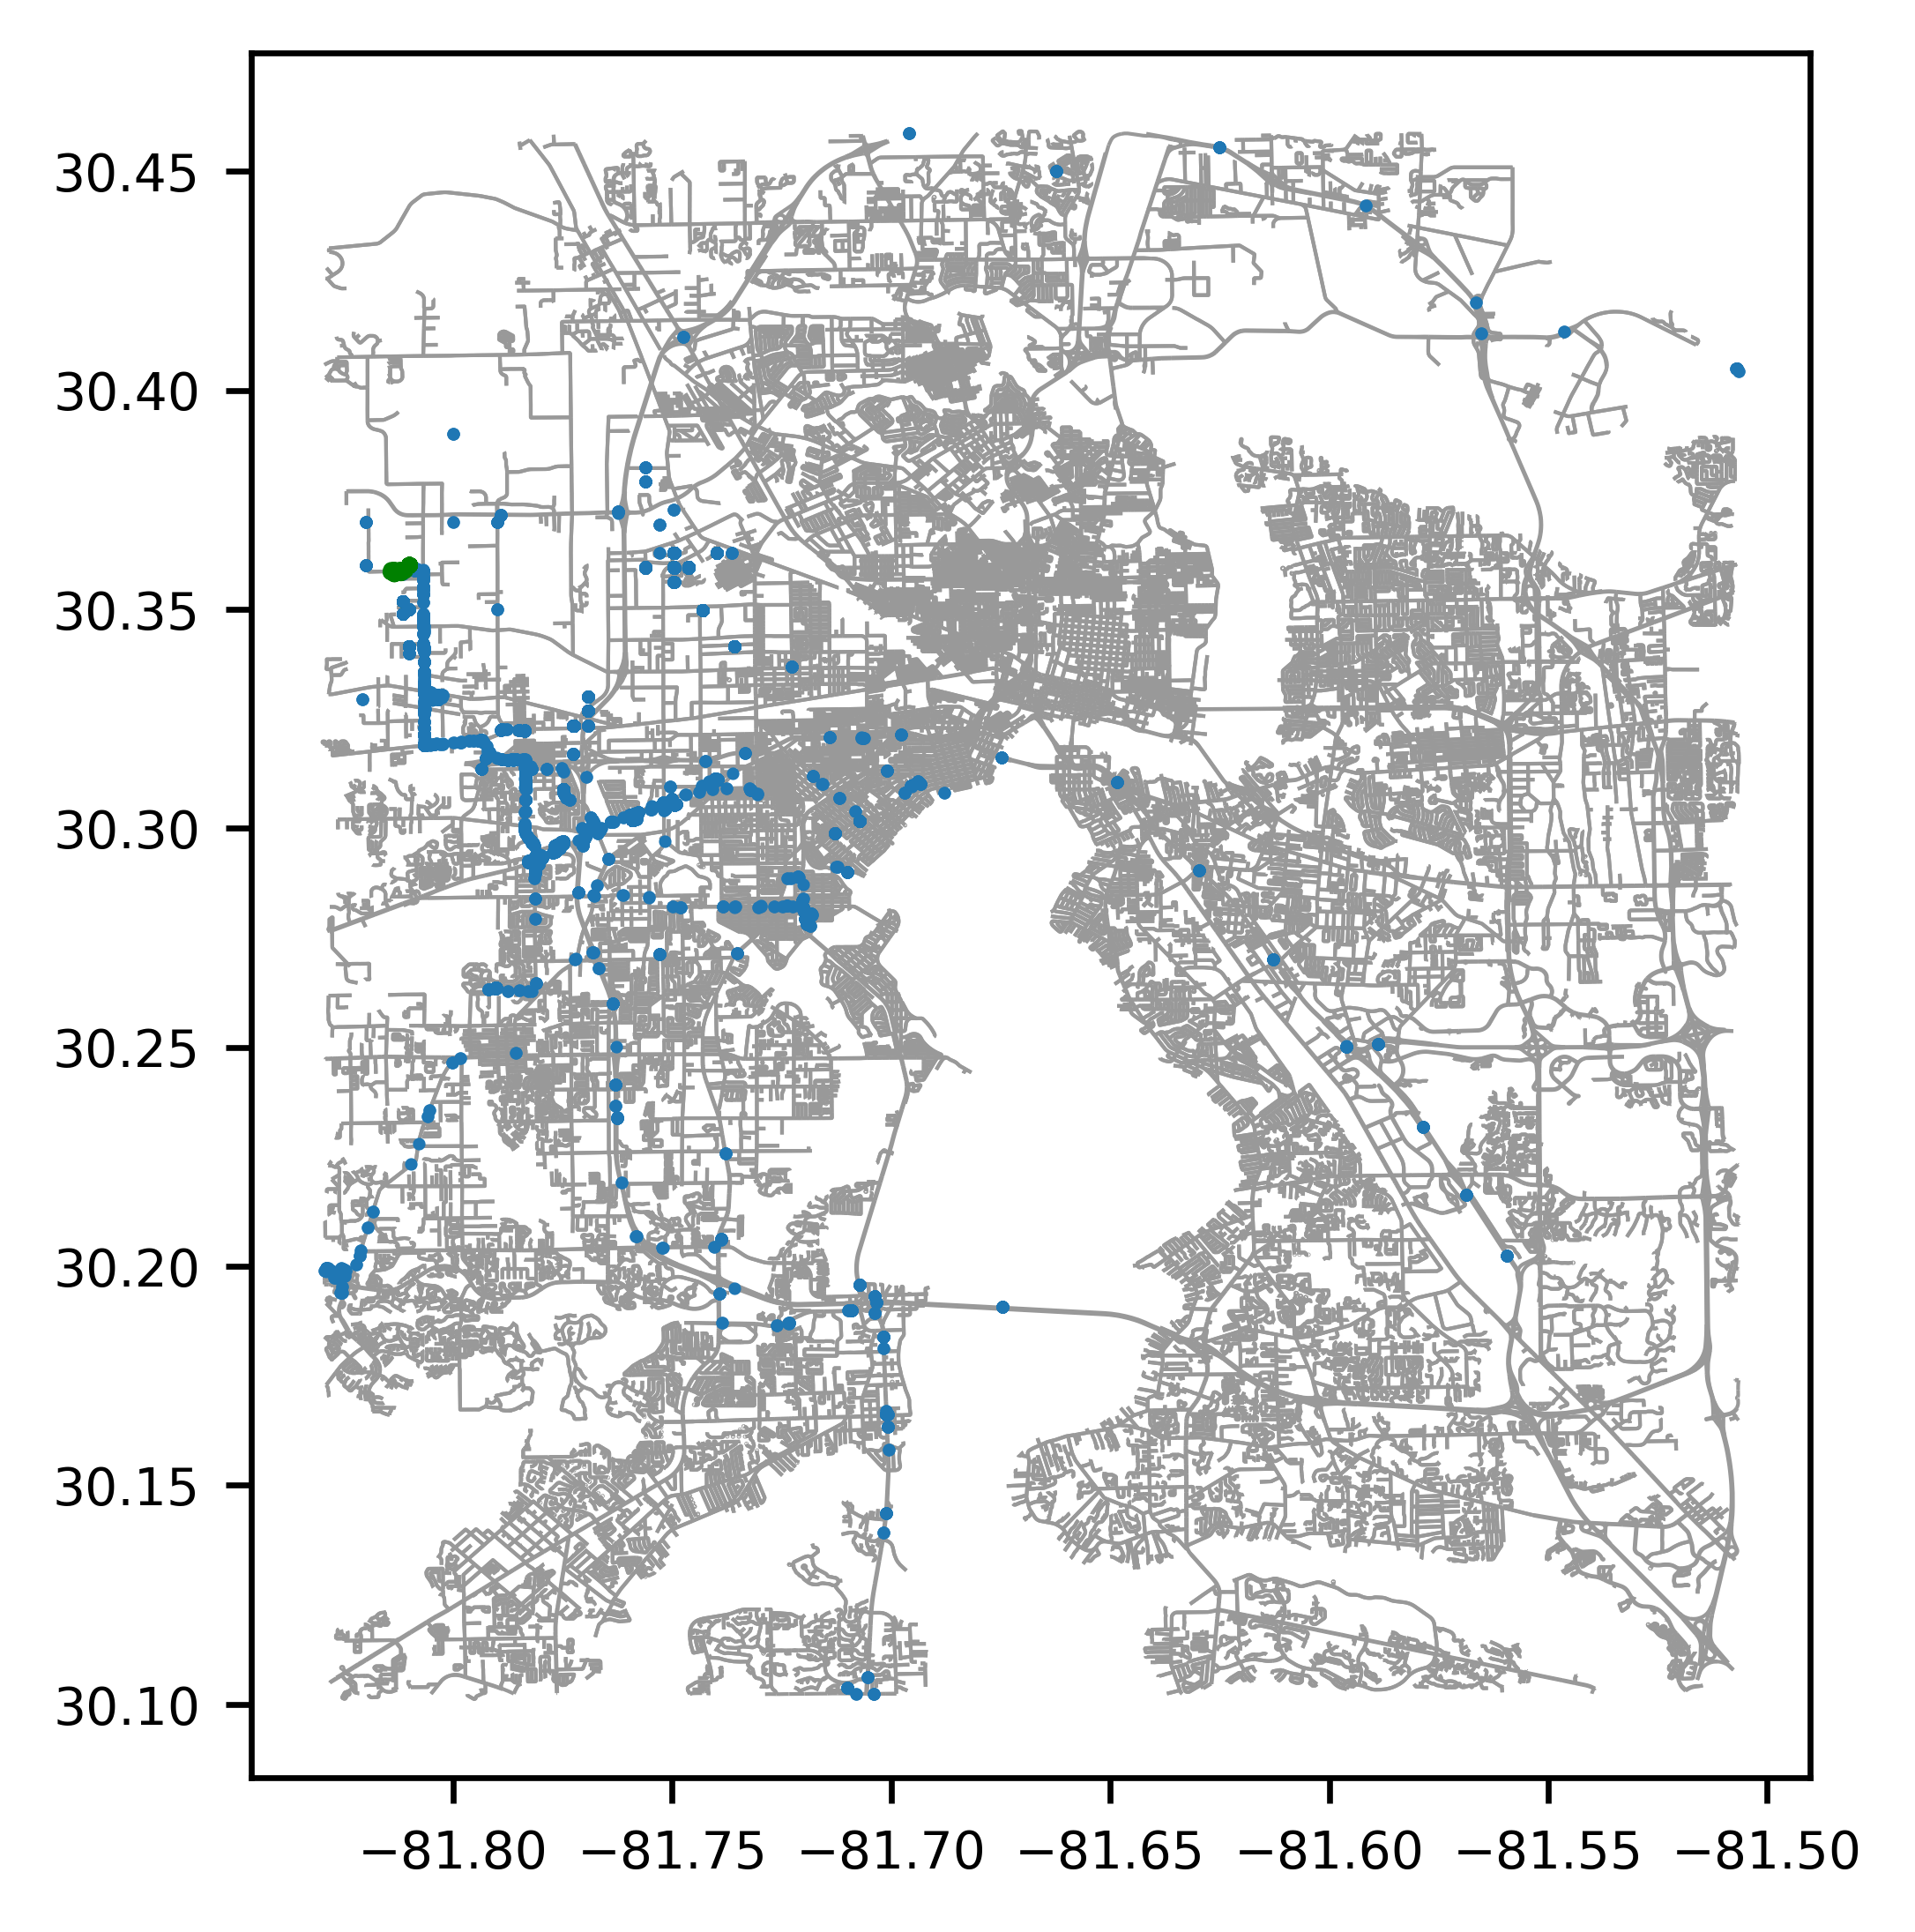

In [9]:
sp_top.as_staypoints.plot(radius=100, positionfixes=pfs_top, plot_osm=True)